<a href="https://colab.research.google.com/github/Bisu7/Clothes-Identifier/blob/main/Fashion(knn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification using K-Nearest Neighbors (KNN) on Fashion MNIST

**Problem Defination:-**

The objective of this project is to classify images of clothing items into categories such as T-shirts, trousers, shoes, etc., using a K-Nearest Neighbors (KNN) classifier. This problem is a standard multi-class classification task where each input image is associated with one of the 10 categories.

**Why This Problem:-**

In the age of e-commerce and digital fashion, automatic recognition of clothing items has numerous applications, from inventory management to personalized recommendations. The Fasion MNIST dataset is used here to develop and evaluate machine learning models (KNN) to classify clothing items, laying the groundwork for more advanced applications in real-world retail and fashion industries.

**Approach:-**


1.   Data Loading and Preprocessing: The Fashion MNIST dataset is a collection of grayscale 28x28 pixel images, each representing a clothing item. The images are divided into training and test sets, with labels indicating the type of clothing. The images are normalized to have pixel values between 0 and 1 to ensure uniformity across the dataset.
2.   Flattening the Images: Since K-Nearest Neighbors (KNN) requires a flat vector representation, each 28x28 image is reshaped into a 784-dimensional vector. This transformation allows us to compute Euclidean distances between images in a consistent manner.
3.  KNN Classifier Implementation: A custom KNN classifier is implemented that calculates the Euclidean distance between the test image and all training images, selects the k nearest neighbors, and performs majority voting to predict the label. This approach leverages KNN’s ability to classify based on pixel similarity, making it suitable for recognizing simple visual patterns.
4. Performance Evaluation: We assess the model’s accuracy on a subset of the test data to evaluate its performance. Accuracy is calculated as the percentage of correctly classified images, which gives a sense of how well the KNN model distinguishes between different clothing categories.
5.  Example Prediction and Image Uploading: To enhance usability, we incorporate an image upload feature. Users can upload their own grayscale images, which are resized and normalized to match the dataset format. After preprocessing, the uploaded image is classified using the KNN model.
6.  Label Prediction: Upon receiving the uploaded image, the KNN model predicts the clothing category. The predicted label is then displayed along with the uploaded image, providing a user-friendly experience for testing the classifier on custom images.

**Required Plots:-**

*   Sample Training Image: Display one or more images from the dataset to give an idea of the input data.
*   Accuracy Plot: Plot accuracy by varying the value of k to show the effect on the model's performance.

**Detailed Analysis:-**


*  KNN Performance: Discuss the performance observed and any limitations, such as the sensitivity of KNN to data dimensions and computational efficiency.
*   Effect of k: Explain how different values of k affect model accuracy, ideally with a small experiment testing values of k like 1, 3, 5, and 7.

**Instructions for Execution:-**


*   Required Libraries: Ensure tensorflow, numpy, matplotlib, and PIL are installed. Use !pip install pillow if not pre-installed.
*   Upload Image: For custom image classification, upload an image via the ImageUpload() function.

**CODE:-**

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

In [ ]:
# Load and preprocess data
fashion_data = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [ ]:
print(train_images[0].shape)
print(train_images[0])

(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 2

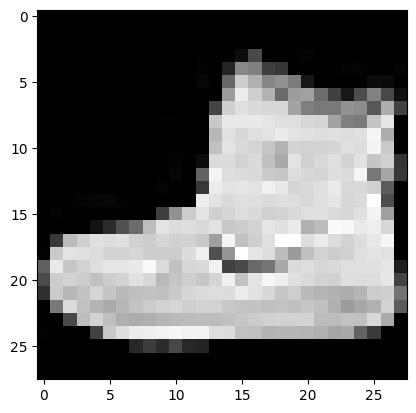

9


In [ ]:
plt.imshow(train_images[0],cmap='gray')
plt.show()
print(train_labels[0])

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [ ]:
train_images_flattened = train_images.reshape(train_images.shape[0], -1)
test_images_flattened = test_images.reshape(test_images.shape[0], -1)

In [ ]:
from collections import Counter

def euclidean_distance(image1, image2):
    return np.sqrt(np.sum((image1 - image2) ** 2)) #Best suited for continuous numerical features

# KNN classifier
def knn_predict(test_image, train_images, train_labels, k):
    distances = [euclidean_distance(test_image, train_image) for train_image in train_images] #distances: A list of Euclidean distances, where each entry corresponds to the distance from the test_image to a training image.

    k_nearest_indices = np.argsort(distances)[:k] #np.argsort(distances): Returns the indices that would sort the distances list in ascending order. [:k]: Selects the first k indices, representing the indices of the k nearest neighbors.

    k_nearest_labels = [train_labels[i] for i in k_nearest_indices] # fetch the corresponding labels from train_labels.

    most_common = Counter(k_nearest_labels).most_common(1)#counts max label
    return most_common[0][0]

In [ ]:
test_predictions = [knn_predict(test_image, train_images_flattened, train_labels, 3) for test_image in test_images_flattened[:100]] #Predictions for the First 100 Test Images

test_acc = np.mean(np.array(test_predictions) == test_labels[:100]) #Calculates the mean of the boolean array.
print('\nTest accuracy with KNN = ', test_acc)


Test accuracy with KNN =  0.85


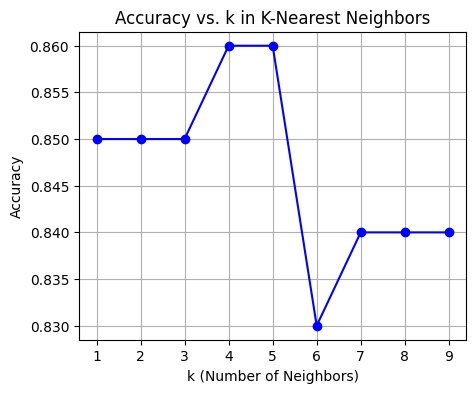

In [ ]:
#Test and record accuracy for different values of k (it will take some time to evaulate,please wait and let it finish)

k_values = range(1, 10)  # Trying k from 1 to 9
accuracies = []

for k in k_values:
    test_predictions = [knn_predict(test_image, train_images_flattened, train_labels, k) for test_image in test_images_flattened[:100]]
    accuracy = np.mean(np.array(test_predictions) == test_labels[:100])
    accuracies.append(accuracy)

plt.figure(figsize=(5, 4))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k in K-Nearest Neighbors')
plt.grid(True)
plt.show()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


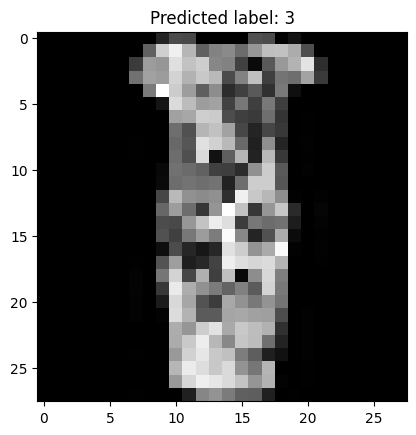

In [ ]:
n=100
plt.imshow(test_images[n], cmap='gray')
plt.title(f"Predicted label: {knn_predict(test_images_flattened[n], train_images_flattened, train_labels, k=3)}")
plt.show()

In [ ]:
pip install pillow

In [ ]:
from google.colab import files
from PIL import Image
import numpy as np

def ImageUpload():
  upload = files.upload()
  for i in upload.keys():
    img = Image.open(i).convert('L') #grayscale conversion
    img = img.resize((28,28))

    imgArray = np.array(img)/255.0
    imgFlat = imgArray.reshape(1,-1)

    plt.imshow(imgArray,cmap = 'gray')
    plt.title("Image")
    plt.show()

    return imgFlat

Saving 1.jpg to 1.jpg


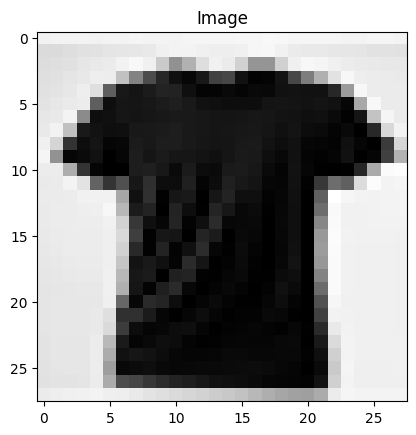

Predicted Label:  Shirt


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Classifying an Unseen data
uploadImage = ImageUpload()
# print(uploadImage[0])
predicted_label = knn_predict(uploadImage[0], train_images_flattened, train_labels, k=5)
print("Predicted Label: ",class_names[predicted_label])